In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

In [220]:
model = load_model('Model/myModel.h5')

In [222]:
full_img = cv2.imread("img/Sudoku.png")
full_img = cv2.resize(full_img, (450,450), interpolation= cv2.INTER_AREA)
height, width, channels = full_img.shape

In [5]:
a = 5
for i in range(9):
    for j in range(9):
        x1, y1 = int(width * j / 9 + a), int(height * i / 9 + a)
        x2, y2 = int(width * (j + 1) / 9 - a), int(height * (i + 1) / 9 - a)
        img = full_img[y1:(y2 + 1), x1:(x2 + 1)]
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (28,28), interpolation= cv2.INTER_AREA)
        newimg = tf.keras.utils.normalize(resized, axis=1)
        newimg = np.array(newimg).reshape(-1, 28, 28, 1)

        predictas = model.predict(newimg)
        print(np.argmax(predictas), end = ' ')
    print("\n")

5 3 0 0 7 0 0 0 0 

6 0 0 1 9 5 0 0 0 

0 9 8 0 0 0 0 6 0 

8 0 0 0 6 0 0 0 3 

4 0 0 8 0 3 0 0 1 

7 0 0 0 2 0 0 0 6 

0 6 0 0 0 0 2 8 0 

0 0 0 4 1 9 0 0 5 

0 0 0 0 8 0 0 7 9 



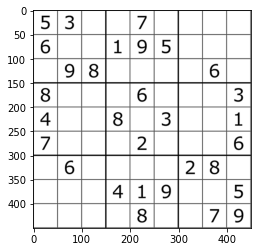

In [223]:
plt.imshow(full_img)

# use a=5 for big font size and a=12 for small font size

In [224]:
board = np.array([])
a = 5   
for i in range(9):
    row = np.array([])
    for j in range(9):
        x1, y1 = int(width * j / 9 + a), int(height * i / 9 + a)
        x2, y2 = int(width * (j + 1) / 9 - a), int(height * (i + 1) / 9 - a)
        img = full_img[y1:(y2 + 1), x1:(x2 + 1)]
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (28,28), interpolation= cv2.INTER_AREA)
        newimg = tf.keras.utils.normalize(resized, axis=1)
        newimg = np.array(newimg).reshape(-1, 28, 28, 1)

        predictas = model.predict(newimg)
        row = np.append(row, np.argmax(predictas))
    board = np.append(board, row).astype('int32')
    board = board.reshape(9,-1)
print(board)

[[5 3 0 0 7 0 0 0 0]
 [6 0 0 1 9 5 0 0 0]
 [0 9 8 0 0 0 0 6 0]
 [8 0 0 0 6 0 0 0 3]
 [4 0 0 8 0 3 0 0 1]
 [7 0 0 0 2 0 0 0 6]
 [0 6 0 0 0 0 2 8 0]
 [0 0 0 4 1 9 0 0 5]
 [0 0 0 0 8 0 0 7 9]]


In [225]:
def valid(x, y, n):
    for i in range(9):
        if board[x][i] == n:
            return False
    for i in range(9):
        if board[i][y] == n:
            return False
    x0 = (x//3)*3
    y0 = (y//3)*3
    for i in range(3):
        for j in range(3):
            if board[x0+i][y0+j] == n:
                return False
    return True

In [226]:
def solve():
    for i in range(9):
        for j in range(9):
            if board[i][j]==0:
                for n in range(1,10):
                    if valid(i,j,n):
                        board[i][j]=n
                        solve()
                        board[i][j]=0
                return
    print(board)   

In [227]:
solve()

[[5 3 4 6 7 8 9 1 2]
 [6 7 2 1 9 5 3 4 8]
 [1 9 8 3 4 2 5 6 7]
 [8 5 9 7 6 1 4 2 3]
 [4 2 6 8 5 3 7 9 1]
 [7 1 3 9 2 4 8 5 6]
 [9 6 1 5 3 7 2 8 4]
 [2 8 7 4 1 9 6 3 5]
 [3 4 5 2 8 6 1 7 9]]
